In [86]:
import pandas as pd 
import numpy as np 
import gc 
import datetime as dt 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
%ls 

 Volume in drive C is Bordello
 Volume Serial Number is 3A57-C048

 Directory of C:\Users\Ukasz\Desktop\Data ScienceProjects\ufo-sightings

24.04.2021  22:00    <DIR>          .
24.04.2021  22:00    <DIR>          ..
24.04.2021  22:00    <DIR>          .ipynb_checkpoints
24.04.2021  22:00       121˙564˙466 nuforc_reports.csv
24.04.2021  22:00                72 Untitled.ipynb
               2 File(s)    121˙564˙538 bytes
               3 Dir(s)  123˙367˙247˙872 bytes free


In [4]:
csv_file = r"nuforc_reports.csv"
df = pd.read_csv(csv_file,delimiter=",")

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68752 entries, 0 to 88123
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   city            68752 non-null  object        
 1   date_time       68752 non-null  datetime64[ns]
 2   duration        68752 non-null  object        
 3   Year            68752 non-null  int64         
 4   stats           68752 non-null  object        
 5   posted          68752 non-null  object        
 6   city_latitude   68752 non-null  float64       
 7   city_longitude  68752 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 7.2+ MB


In [7]:
df.head()

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12T18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.343152,-77.408582
1,I think that I may caught a UFO on the NBC Nig...,Rocky Hill,CT,2019-03-22T18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29T00:00:00,41.664800,-72.639300
2,I woke up late in the afternoon 3:30-4pm. I we...,NaN,NaN,NaN,NaN,NaN,Occurred : 4/1/2019 15:45 (Entered as : April...,http://www.nuforc.org/webreports/145/S145556.html,I woke up late in the afternoon 3:30-4pm. I w...,NaN,NaN,NaN
3,I was driving towards the intersection of fall...,Ottawa,ON,2019-04-17T02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18T00:00:00,45.381383,-75.708501
4,"In Peoria Arizona, I saw a cigar shaped craft ...",Peoria,NY,2009-03-15T18:00:00,cigar,2 minutes,Occurred : 3/15/2009 18:00 (Entered as : 03/1...,http://www.nuforc.org/webreports/145/S145723.html,"In Peoria, Arizona, I saw a cigar shaped craft...",2019-04-18T00:00:00,NaN,NaN


In [15]:
drop_list = ["summary","state","shape","report_link","text"]

In [20]:
df.drop(drop_list, axis="columns" , inplace=True)

In [23]:
df.dropna(inplace=True) 

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68752 entries, 0 to 88123
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   city            68752 non-null  object        
 1   date_time       68752 non-null  datetime64[ns]
 2   duration        68752 non-null  object        
 3   stats           68752 non-null  object        
 4   posted          68752 non-null  object        
 5   city_latitude   68752 non-null  float64       
 6   city_longitude  68752 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 6.7+ MB


In [35]:
df["date_time"] = pd.to_datetime(df["date_time"])

In [37]:
df.insert(loc=3, column="Year", value=df["date_time"].dt.year)

In [43]:
df.groupby(['Year']).count()

,city,date_time,duration,stats,posted,city_latitude,city_longitude
Year,,,,,,,
1969,66,66,66,66,66,66,66
1970,70,70,70,70,70,70,70
1971,45,45,45,45,45,45,45
1972,62,62,62,62,62,62,62
1973,101,101,101,101,101,101,101
1974,113,113,113,113,113,113,113
1975,130,130,130,130,130,130,130
1976,115,115,115,115,115,115,115
1977,116,116,116,116,116,116,116


In [47]:
over_2006 = df[df["Year"] >= 2006]

In [51]:
over_2006.groupby(['Year']).count()

,city,date_time,duration,stats,posted,city_latitude,city_longitude
Year,,,,,,,
2006,2700,2700,2700,2700,2700,2700,2700
2007,3653,3653,3653,3653,3653,3653,3653
2008,4176,4176,4176,4176,4176,4176,4176
2009,3797,3797,3797,3797,3797,3797,3797
2010,3770,3770,3770,3770,3770,3770,3770
2011,4541,4541,4541,4541,4541,4541,4541
2012,6632,6632,6632,6632,6632,6632,6632
2013,6447,6447,6447,6447,6447,6447,6447
2014,7136,7136,7136,7136,7136,7136,7136


In [60]:
over_2006[["stats","Year"]].groupby(['Year']).count()

,stats
Year,
2006,2700
2007,3653
2008,4176
2009,3797
2010,3770
2011,4541
2012,6632
2013,6447
2014,7136


In [76]:
interesting_three = df[(df["Year"]==2012) | (df["Year"]==2013) | (df["Year"]==2014) ]

<AxesSubplot:>

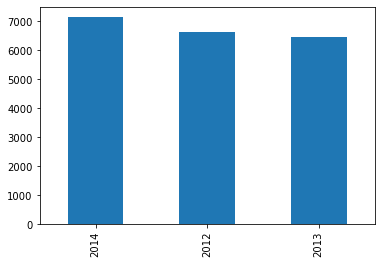

In [87]:
interesting_three.Year.value_counts().plot(kind="bar")

<AxesSubplot:>

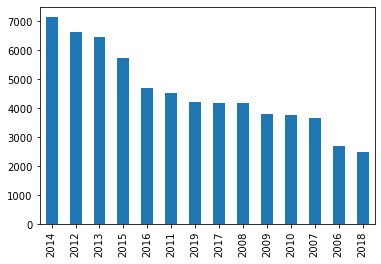

In [89]:
over_2006.Year.value_counts().plot(kind="bar")